In [1]:
#importing required libraries
import pickle
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.models import model_from_json

Using TensorFlow backend.
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as style
import pandas_datareader.data as web

C:\Users\Nitin\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import time
today = time.strftime("%Y,%m,%d")

In [4]:
y=int(today.split(",")[0])
m=int(today.split(',')[1])
d=int(today.split(',')[2])

In [5]:
start=dt.datetime(2014,1,1)
end=dt.datetime(y,m,d)

In [6]:
comp=['YESBANK.BO','ASHOKLEY.NS','ICICIBANK.NS','BHARTIARTL.NS','TATAPOWER.NS','MOTHERSUMI.NS','RPOWER.NS','HATHWAY.NS']

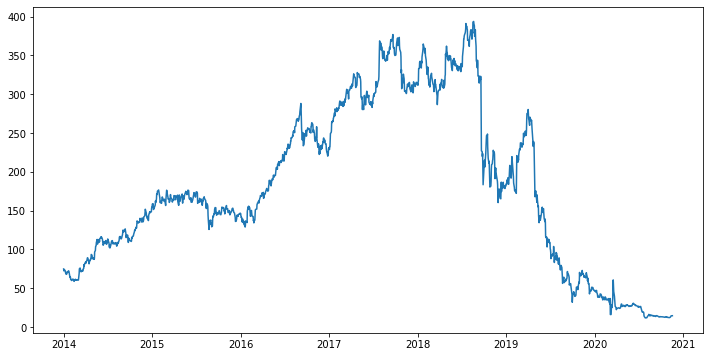

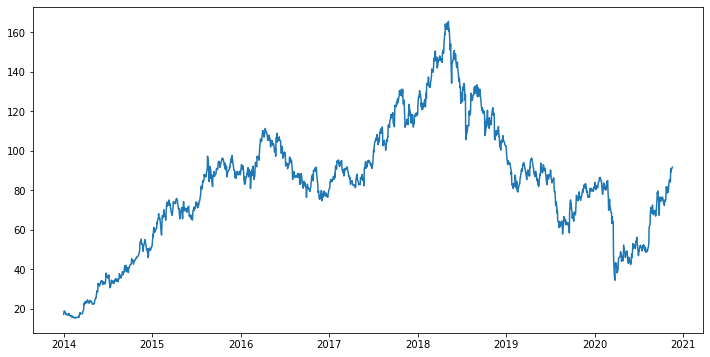

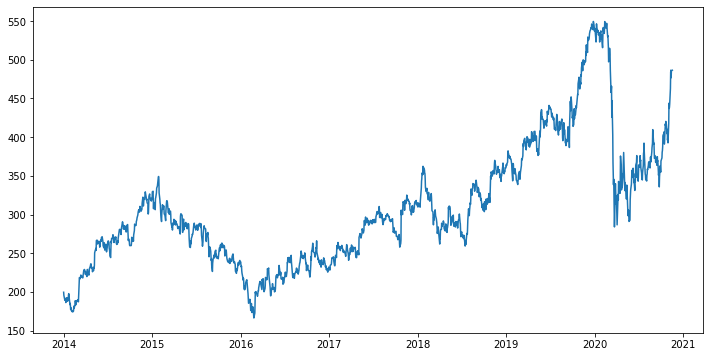

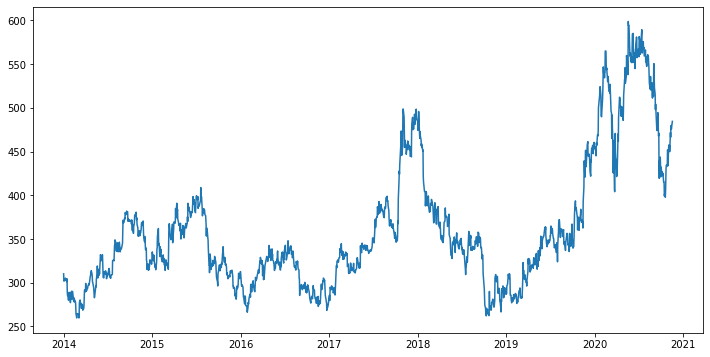

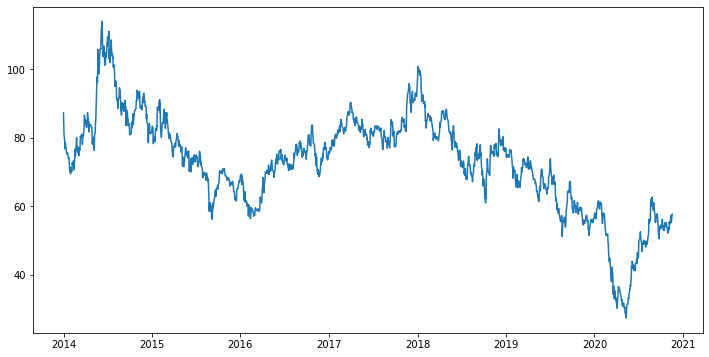

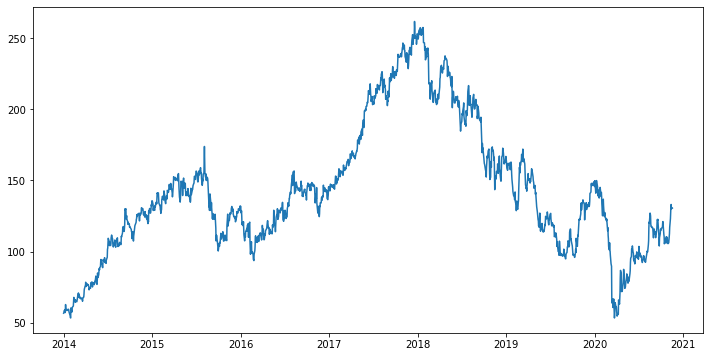

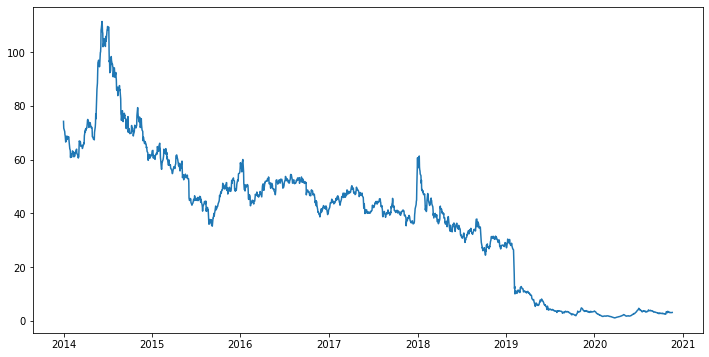

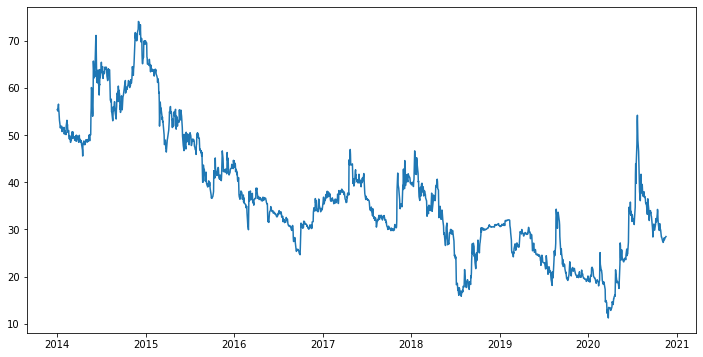

In [10]:
list_price=[]
yes_price=[]
prev=[]
for c in comp:
    # load json and create model
    model_name='model_'+c+'.json'
    json_file = open(model_name, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    wgt_name='model_'+c+'h5'
    # load weights into new model
    loaded_model.load_weights(wgt_name)
    df=web.DataReader(c,'yahoo',start,end)
    yes_price.append(df['Close'][-1])
    df['Date']=df.index
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']
    plt.figure(figsize=(12,6))
    plt.plot(df['Close'], label='Close Price history')
    df = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(df['Date'])):
        new_data['Date'][i] = df['Date'][i]
        new_data['Close'][i] = df['Close'][i]
    date=[]
    for i in range(len(new_data)):
        date.append(str(new_data['Date'][i]))
    y=[]
    m=[]
    d=[]
    for i in range(len(new_data)):
        y.append(str(new_data['Date'][i]).split("-")[0])
        m.append(str(new_data['Date'][i]).split("-")[1])
        d.append(str(new_data['Date'][i]).split("-")[2])
    da=[]
    prev.append(df['Close'][-1])
    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    inputs = new_data[len(new_data) - 61:]['Close'].values
    inputs = inputs.reshape(-1,1)
    inputs = scaler.fit_transform(inputs)
    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = loaded_model.predict(X_test)
    closing_price=scaler.inverse_transform(closing_price)
    list_price.append(closing_price[0][0])
    #fin.append(avg[0]/new_data['Close'][l])

In [11]:
yes_price

[14.65999984741211,
 91.75,
 486.3999938964844,
 484.54998779296875,
 57.650001525878906,
 130.60000610351562,
 3.0999999046325684,
 28.5]

In [12]:
list_price

[13.505152,
 88.726616,
 462.69772,
 471.33685,
 55.799557,
 122.22629,
 3.0674288,
 27.889793]

In [22]:
best=0
pos=-1
for i in range(len(yes_price)):
    cur=(list_price[i]-yes_price[i])/yes_price[i]
    if(cur>best):
        pos=i
        best=cur

In [23]:
if(pos==-1):
    print("Not a good time to invest in market")
else:
    print('The {} will Best bid if you want to purchase'.format(comp[pos]))

Not a good time to invest in market
